# Practice Session 01+02: Data preparation

<font size="+2" color="blue">Additional results: model purchased device</font>

Author: <font color="blue">Àlex Montoya Pérez</font>

E-mail: <font color="blue">alex.montoya01@estudiant.upf.edu</font>

Date: <font color="blue">05/10/2023</font>

# 1. Exploratory data analysis

In [480]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [481]:
import sklearn

# **Google Colaboratory Setup**

In order to develop this laboratory, I used Google Colaboratory, since I have worked with different files I had to set up the environment as follows:


1.   Importing the drive module from the google.colab package.
2.   Mounting the Google Drive at the specified path (/content/drive).
3.   Changing the current working directory to the directory where I have all needed data /content/drive/MyDrive/MineriaDadesMasives/Labs/.

Verify that we are in the correct directory:


4.   Printing the current working directory path using !pwd.
5.   Listing the contents of the current directory using !ls.

In [482]:
from google.colab import drive
drive.mount('/content/drive')
#Here is how to change current working directory
#By default the current working directory is /content
%cd /content/drive/MyDrive/MineriaDadesMasives/Labs/
#Print path and content of the current directory
!pwd
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MineriaDadesMasives/Labs
/content/drive/MyDrive/MineriaDadesMasives/Labs
data				 ps06_item_based_recsys.ipynb
old				 ps07_outlier_analysis.ipynb
ps01_02_data_preparation.ipynb	 ps08_data_streams.ipynb
ps03_near_duplicates.ipynb	 ps09_forecasting.ipynb
ps04_association_rules.ipynb	 README.md
ps05_content_based_recsys.ipynb


In [483]:
# LEAVE AS-IS
input_dataset = pd.read_csv("data/device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [484]:
# The function .head(n) returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.
# By default n=5
input_dataset.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [485]:
# Create an empty array where all the information will be stored
data = []

# Iterate through the columns of the dataset
for column in input_dataset.columns:
    data.append({'Column Name': column, 'Column Type': input_dataset[column].dtype, 'Distinct Elements': input_dataset[column].nunique()})

# Create the DataFrame and load all the data recolected
column_type_df = pd.DataFrame(data, columns=['Column Name', 'Column Type', 'Distinct Elements'])

# Display the resulting DataFrame
display(column_type_df)

,Column Name,Column Type,Distinct Elements
0,PURCHASED_DEVICE,object,101
1,DEVICE_VALUE,float64,368
2,LAST_DEVICE_CHANGE,float64,76
3,DATA_TRAFFIC_MONTH_1,float64,7215
4,DATA_TRAFFIC_MONTH_2,float64,7182
5,DATA_TRAFFIC_MONTH_3,float64,7176
6,DATA_TRAFFIC_MONTH_4,float64,7124
7,DATA_TRAFFIC_MONTH_5,float64,7173
8,DATA_TRAFFIC_MONTH_6,float64,7074
9,VOICE_TRAFFIC_MONTH_1,float64,3550


In [486]:
# Create an empty array where all the information will be stored
data_stats = []

# Iterate through the columns of the dataset
for column in input_dataset.columns:
  if input_dataset[column].dtype == 'float64':
    data_stats.append({'Column Name': column,
                       'Column Type': input_dataset[column].dtype,
                       'Mean': np.mean(input_dataset[column]) ,
                       'Median': np.nanmedian(input_dataset[column]) ,
                       'Maximum': np.max(input_dataset[column]) ,
                       'Minimum': np.min(input_dataset[column])})

# Create the DataFrame and load all the data recolected
stats_df = pd.DataFrame(data_stats, columns=['Column Name', 'Column Type', 'Mean', "Median", "Maximum", "Minimum"])

# Display the resulting DataFrame
display(stats_df)

,Column Name,Column Type,Mean,Median,Maximum,Minimum
0,DEVICE_VALUE,float64,7.504842e+02,3.930000e+02,9.057000e+03,15.00
1,LAST_DEVICE_CHANGE,float64,2.016698e+07,2.017060e+07,2.019050e+07,20121001.00
2,DATA_TRAFFIC_MONTH_1,float64,3.481826e+03,1.208728e+03,1.270176e+05,0.00
3,DATA_TRAFFIC_MONTH_2,float64,3.649958e+03,1.294951e+03,1.119488e+05,0.00
4,DATA_TRAFFIC_MONTH_3,float64,3.653427e+03,1.310675e+03,1.119488e+05,0.00
5,DATA_TRAFFIC_MONTH_4,float64,3.269441e+03,1.176539e+03,8.785641e+04,0.00
6,DATA_TRAFFIC_MONTH_5,float64,3.673368e+03,1.287094e+03,1.218348e+05,0.00
7,DATA_TRAFFIC_MONTH_6,float64,3.427690e+03,1.277116e+03,9.055061e+04,0.00
8,VOICE_TRAFFIC_MONTH_1,float64,1.548522e+02,8.405000e+01,4.220100e+03,0.00
9,VOICE_TRAFFIC_MONTH_2,float64,1.425679e+02,7.490000e+01,3.132100e+03,0.00


In [487]:
# Iterate through the columns of the dataset
for column in input_dataset.columns:
    print(f"Column Name: {column}")
    print(input_dataset[column].describe())
    print()  # Print a blank line after each description

Column Name: PURCHASED_DEVICE
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object

Column Name: DEVICE_VALUE
count    9690.000000
mean      750.484211
std       979.710272
min        15.000000
25%       297.000000
50%       393.000000
75%       609.000000
max      9057.000000
Name: DEVICE_VALUE, dtype: float64

Column Name: LAST_DEVICE_CHANGE
count    7.682000e+03
mean     2.016698e+07
std      1.092577e+04
min      2.012100e+07
25%      2.016080e+07
50%      2.017060e+07
75%      2.017100e+07
max      2.019050e+07
Name: LAST_DEVICE_CHANGE, dtype: float64

Column Name: DATA_TRAFFIC_MONTH_1
count      8868.000000
mean       3481.825663
std        6364.542706
min           0.000000
25%          51.923114
50%        1208.728050
75%        4249.164900
max      127017.

**Results of previous results for DEVICE_COST_MONTH_1 :**


*   Mean = 1.080778e+01
*   Median = 0.000000e+00
*   Minimum = 0.000000e+00
*   Maximum = 6.440000e+03


**Results from .describe() for DEVICE_COST_MONTH_1:**

* count    9999.000000
*  mean       10.807785
*  std        75.834602
*  min         0.000000
*  25%         0.000000
*  50%         0.000000
*  75%         0.620000
*  max      6440.000000

**Differences**

The main difference comes from the way they calculate the mean, in the previous function we ignored the NaN values using the numpy function nanmedian(), meanwhile the other one counts them as a 0 automaticaly, what makes mean lower.

Moreover, another difference related to the mean is that numpy uses slightly alternated pairwise summation, while Panda use naive summation. Because of this, even being float64 we can found some little error. Panda uses this type of calculation because is faster but less precise than numpy's one.

## 1.2. Inventory of device models

In [488]:
## PREVIOUS_DEVICE_MODEL
previous_model = pd.DataFrame(input_dataset["PREVIOUS_DEVICE_MODEL"].value_counts())
display(previous_model)

## PREVIOUS_DEVICE_BRAND
previous_brand = pd.DataFrame(input_dataset["PREVIOUS_DEVICE_BRAND"].value_counts())
display(previous_brand)

,PREVIOUS_DEVICE_MODEL
iPhone 7,425
iPhone 6,250
Samsung Galaxy J5,243
iPhone 6S,212
Samsung Galaxy J1 Mini,204
...,...
LG Optimus L3 II,1
"Lenovo S930,Lenovo S939",1
Samsung Corby II,1
SGH-U600,1


,PREVIOUS_DEVICE_BRAND
Samsung,1877
Outros,1592
Apple,1548
Motorola,638
LG,514


**QUESTION:**

The most common device model and the most common device brand do not match, why do you think it is so? Replace this cell with an explanation.

**SOLUTION:**

Due to the wide variety of popular Samsung phone models available, there is a broader customer base for Samsung compared to Apple, which primarily focuses on one popular phone at a time—the latest model. However, it's worth noting that the iPhone 7 has garnered a considerable number of buyers, even surpassing the popularity of many individual Samsung models.

# 2. Feature engineering

## 2.1. Missing values management

In [489]:
# Create an empty array where all the information will be stored
nan_data = []

# Iterate through the columns of the dataset
for column in input_dataset.columns:
  if input_dataset[column].isna().any():#if in this column exist some nan we enter in if
    nan_data.append({'Column Name': column, 'Number of NaN Values': input_dataset[column].isna().sum(), 'Number of non NaN Values': input_dataset[column].notna().sum()})

# Create the DataFrame and load all the data recolected
nan_counter = pd.DataFrame(nan_data, columns=['Column Name', 'Number of NaN Values', 'Number of non NaN Values'])

# Display the resulting DataFrame
display(nan_counter)

,Column Name,Number of NaN Values,Number of non NaN Values
0,PURCHASED_DEVICE,147,9853
1,DEVICE_VALUE,310,9690
2,LAST_DEVICE_CHANGE,2318,7682
3,DATA_TRAFFIC_MONTH_1,1132,8868
4,DATA_TRAFFIC_MONTH_2,1159,8841
5,DATA_TRAFFIC_MONTH_3,1154,8846
6,DATA_TRAFFIC_MONTH_4,1183,8817
7,DATA_TRAFFIC_MONTH_5,1134,8866
8,DATA_TRAFFIC_MONTH_6,1465,8535
9,VOICE_TRAFFIC_MONTH_1,1132,8868


In [490]:
#create a copy of previous dataframe
input_dataset_processed = pd.DataFrame(input_dataset) #create a copy of previous dataframe

# dropna function allows us to delete the rows where are some nan values. Using subset argument we can select from what columns do we want to drop the row if there is some nan value
input_dataset_processed = input_dataset_processed.dropna(subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL'])

In [491]:
# fillna function fills of the selected columns the nan values if it founds someone. With argument value we can choose what to put instead of nan values
#we store the columns on a new dataframe

#Assumed value --> 0
assumed_value = 0

#DATA_TRAFFIC_MONTH_(1..6)
input_dataset_processed[['DATA_TRAFFIC_MONTH_1','DATA_TRAFFIC_MONTH_2','DATA_TRAFFIC_MONTH_3','DATA_TRAFFIC_MONTH_4','DATA_TRAFFIC_MONTH_5','DATA_TRAFFIC_MONTH_6']] = input_dataset_processed[['DATA_TRAFFIC_MONTH_1','DATA_TRAFFIC_MONTH_2','DATA_TRAFFIC_MONTH_3','DATA_TRAFFIC_MONTH_4','DATA_TRAFFIC_MONTH_5','DATA_TRAFFIC_MONTH_6']].fillna(value = assumed_value)
#VOICE_TRAFFIC_MONTH_(1..6)
input_dataset_processed[['VOICE_TRAFFIC_MONTH_1','VOICE_TRAFFIC_MONTH_2','VOICE_TRAFFIC_MONTH_3','VOICE_TRAFFIC_MONTH_4','VOICE_TRAFFIC_MONTH_5','VOICE_TRAFFIC_MONTH_6']] = input_dataset_processed[['VOICE_TRAFFIC_MONTH_1','VOICE_TRAFFIC_MONTH_2','VOICE_TRAFFIC_MONTH_3','VOICE_TRAFFIC_MONTH_4','VOICE_TRAFFIC_MONTH_5','VOICE_TRAFFIC_MONTH_6']].fillna(value = assumed_value)
#BILLING_TRAFFIC_MONTH_(1..6)
input_dataset_processed[['BILLING_MONTH_1','BILLING_MONTH_2','BILLING_MONTH_3','BILLING_MONTH_4','BILLING_MONTH_5','BILLING_MONTH_6']] = input_dataset_processed[['BILLING_MONTH_1','BILLING_MONTH_2','BILLING_MONTH_3','BILLING_MONTH_4','BILLING_MONTH_5','BILLING_MONTH_6']].fillna(value = assumed_value)
#DEVICE_COST_MONTH_(1..6)
input_dataset_processed[['DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2','DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4','DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6']] = input_dataset_processed[['DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2','DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4','DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6']].fillna(value = assumed_value)


In [492]:
# In that case, we fill NaN values of the column LINE_ACTIVATION_DATE, with the value of LAST_DEVICE_CHANGE in the original dataset, instead of an assumed value
input_dataset_processed['LINE_ACTIVATION_DATE'] = input_dataset['LINE_ACTIVATION_DATE'].fillna(input_dataset['LAST_DEVICE_CHANGE'])

In [493]:
#show the first 10 rows of the new dataframe
display(input_dataset_processed.head(10))

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.500000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.700000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.100000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.700000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.899990,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.500000,...,0.0,0.0,0.0,0.0,20170905.0,15.0,15.0,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.899990,...,0.0,0.0,0.0,0.0,20100809.0,41.0,100.0,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.20560,2196.57450,2196.57450,1815.70090,2101.68160,3224.28340,206.899990,...,13.0,13.0,13.0,13.0,20121029.0,23.0,74.0,iPhone 6,Apple Inc,Apple
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,20181101.0,10789.82000,10423.67400,10423.67400,5188.59670,7379.40430,6789.48290,64.300003,...,0.0,0.0,0.0,0.0,20120509.0,1.0,79.0,iPhone 6,Apple Inc,Apple
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20141101.0,793.15601,734.51996,734.51996,156.38121,467.95233,721.30389,2.700000,...,0.0,0.0,0.0,0.0,20141130.0,49.0,49.0,Samsung Galaxy J5,Samsung Korea,Samsung


In [494]:
#We use shape function to know the shape of the selected dataframe

## Original Dataset
M = input_dataset.shape[0]
print("Rows in the original dataset:", M , "\n")

## Processed Dataset
N = input_dataset_processed.shape[0]
print("Rows in the new dataset:", N ,"\n")

#Once we got the respectevely shapes, we use the formula N ((100*(M-N)/M) to know the % of rows dropped")
print("Percentatge of rows that were dropped: ", ((100*(M-N)/M)), "% \n")

Rows in the original dataset: 10000 

Rows in the new dataset: 5988 

Percentatge of rows that were dropped:  40.12 % 



## 2.2. Distributions, outliers, and correlations

### DEVICE VALUE HISTOGRAM
---

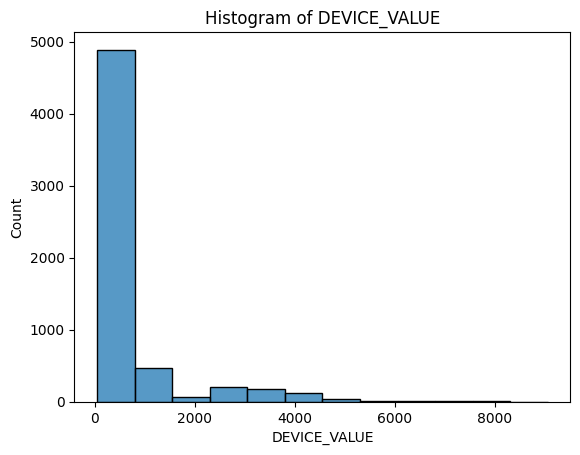

In [495]:
#histplot function allows us to plot an histogram of the data introduced as arguments.
  ##the first argument is the dataframe, the second the column that we want to plot the histogram
  ##bins is the number of bars plotted in the histogram, In that case, I selected 12 as a kind of random number to see clearly the distribution
sns.histplot(input_dataset_processed, x = 'DEVICE_VALUE', bins = 12)
#Set the title
plt.title("Histogram of DEVICE_VALUE")
#show the figure
plt.show()

In this histogram, the pattern clearly follows an exponential distribution. Additionally, it's evident that this distribution is unimodal, displaying only a single peak.

### VOICE TRAFFIC MONTH [1-3] HISTOGRAM
---

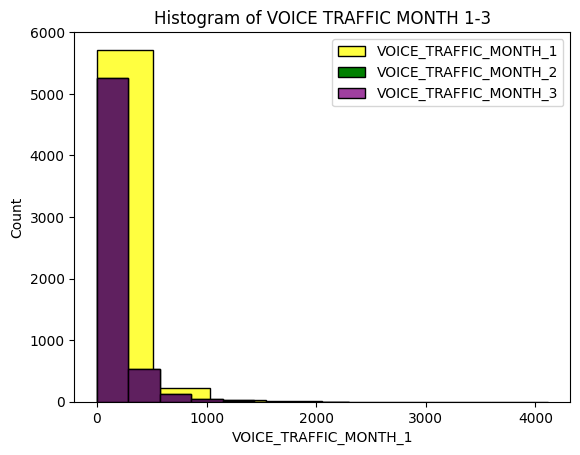

In [496]:
#in this cell and so on we repeat the same thing with different column changing the color with argument color
sns.histplot(input_dataset_processed, x = 'VOICE_TRAFFIC_MONTH_1', bins = 8, color = 'yellow', alpha = 0.75)
sns.histplot(input_dataset_processed, x = 'VOICE_TRAFFIC_MONTH_2', bins = 8, color = 'green', alpha = 1)
sns.histplot(input_dataset_processed, x = 'VOICE_TRAFFIC_MONTH_3', bins = 8, color = 'purple', alpha = 0.75)

#Set the title
plt.title("Histogram of VOICE TRAFFIC MONTH 1-3")
#Set the legend
plt.legend(['VOICE_TRAFFIC_MONTH_1','VOICE_TRAFFIC_MONTH_2','VOICE_TRAFFIC_MONTH_3'])
#show the figure
plt.show()


Like the other histograms, we observe consistent unimodal exponential distributions over the three-month period.

Note: VOICE_TRAFFIC_MONTH_2 and VOICE_TRAFFIC_MONTH_3 have overlapping data due to their similarities. I tried different alpha values in order to print them clearly

### BILLING MONTH 2 HISTOGRAM
---

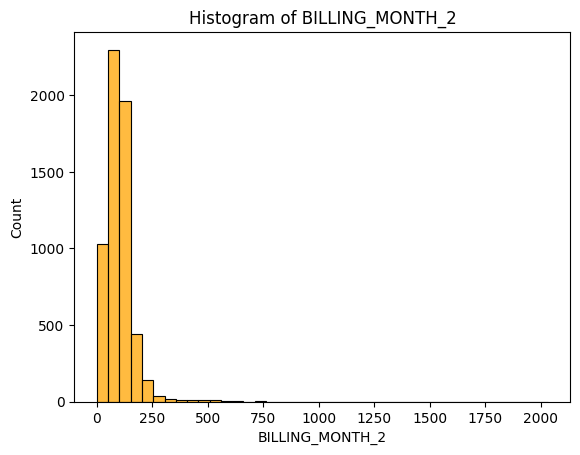

In [497]:
#in this cell and so on we repeat the same thing with different column changing the color with argument color
sns.histplot(input_dataset_processed, x = 'BILLING_MONTH_2', bins = 40, color = 'orange')
#Set the title
plt.title("Histogram of BILLING_MONTH_2")
#show the figure
plt.show()

As we saw in the first case, here we can see an unimodal exponential distribution.

### DURATION HISTOGRAM
---

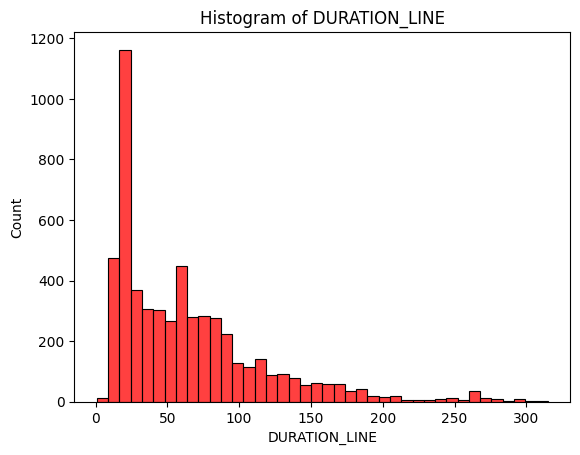

In [498]:
#in this cell and so on we repeat the same thing with different column changing the color with argument color
sns.histplot(input_dataset_processed, x = 'DURATION_LINE', bins = 40, color = 'red')
#Set the title
plt.title("Histogram of DURATION_LINE")
#show the figure
plt.show()

In that case, the curve is smoother but it is also an unimodal exponential distribution.

### VOICE TRAFFIC MONTH 2 HISTOGRAM [ log(x+1) applied ]
---




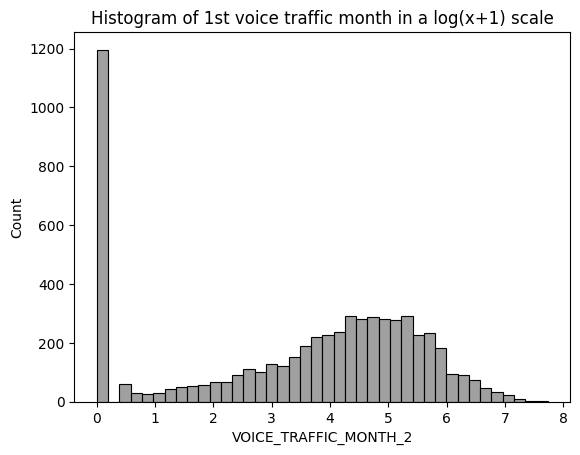

In [499]:
#histogram with log(x+1) scale
sns.histplot(np.log(input_dataset_processed['VOICE_TRAFFIC_MONTH_2']+1), bins = 40, color = 'grey')
plt.title("Histogram of 1st voice traffic month in a log(x+1) scale")
plt.show()

### DATA TRAFFIC MONTH 2 BOXPLOT
---

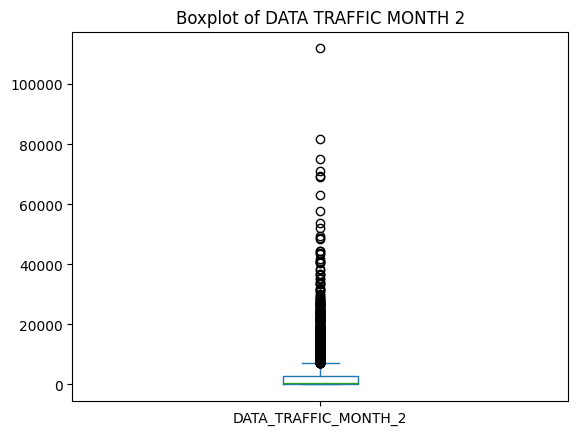

In [500]:
#with plot function and the argument 'kind = box' we are demanding to put a boxplot
input_dataset_processed['DATA_TRAFFIC_MONTH_2'].plot(kind = 'box')
plt.title("Boxplot of DATA TRAFFIC MONTH 2")
plt.show()

### VOICE TRAFFIC MONTH 2 BOXPLOT
---

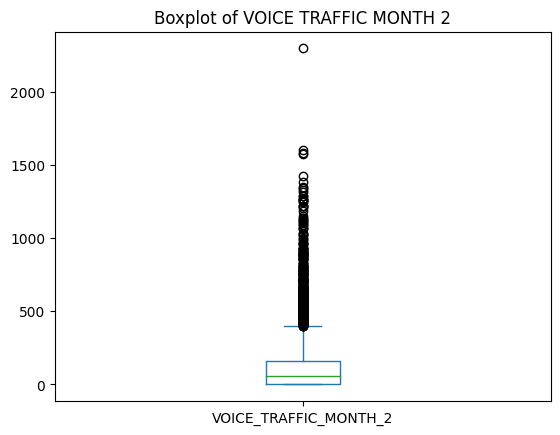

In [501]:
#with plot function and the argument 'kind = box' we are demanding to put a boxplot
input_dataset_processed['VOICE_TRAFFIC_MONTH_2'].plot(kind = 'box')
plt.title("Boxplot of VOICE TRAFFIC MONTH 2")
plt.show()

### BILLING MONTH 2 BOXPLOT
---

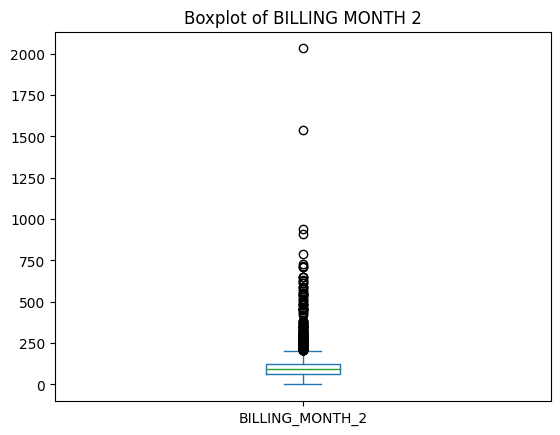

In [502]:
#with plot function and the argument 'kind = box' we are demanding to put a boxplot
input_dataset_processed['BILLING_MONTH_2'].plot(kind = 'box')
plt.title("Boxplot of BILLING MONTH 2")
plt.show()


In the initial boxplot, I'd suggest setting a threshold between 45000 and 50000 due to the sparse distribution of data beyond this range.

Similarly, for the second boxplot, considering the sparse data, I'd recommend a threshold range of 1400 to 1600.

In the final scenario, despite the points being predominantly clustered, if a threshold is necessary, I'd recommend considering a range of 600 to 700.

### CORRELATION TABLE
---

In [503]:
#Store in correlation variable the correlation of all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value with corr() function
correlation = input_dataset_processed[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
                                       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
                                       'DURATION_LINE',
                                       'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
                                       'DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6',
                                       'DEVICE_VALUE']].corr()

display(correlation)#show the table of correlation


,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,VOICE_TRAFFIC_MONTH_5,VOICE_TRAFFIC_MONTH_6,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,...,BILLING_MONTH_4,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,DEVICE_VALUE
VOICE_TRAFFIC_MONTH_1,1.000000,0.815295,0.799665,0.737093,0.727463,0.437434,0.091497,0.080655,0.082316,0.086213,...,0.125612,0.128770,0.136608,-0.008698,0.000574,0.009114,0.003552,0.006573,0.011290,0.023954
VOICE_TRAFFIC_MONTH_2,0.815295,1.000000,0.982587,0.834420,0.812197,0.506034,0.071170,0.082591,0.084456,0.087458,...,0.105186,0.112065,0.118259,-0.006293,0.004728,-0.003244,0.001499,0.001619,0.003926,0.027272
VOICE_TRAFFIC_MONTH_3,0.799665,0.982587,1.000000,0.847852,0.818942,0.505940,0.072724,0.083516,0.084809,0.087728,...,0.107572,0.113864,0.117191,-0.005919,0.005817,-0.002401,0.002626,0.002678,0.005525,0.027570
VOICE_TRAFFIC_MONTH_4,0.737093,0.834420,0.847852,1.000000,0.880459,0.458455,0.067697,0.073245,0.074231,0.090379,...,0.115993,0.121765,0.115676,-0.006851,0.005032,0.005440,-0.003068,-0.001478,0.005517,0.023935
VOICE_TRAFFIC_MONTH_5,0.727463,0.812197,0.818942,0.880459,1.000000,0.498174,0.081116,0.081887,0.081804,0.095345,...,0.120437,0.130767,0.120709,-0.008941,-0.002324,0.003602,-0.005502,-0.005227,0.002095,0.026507
VOICE_TRAFFIC_MONTH_6,0.437434,0.506034,0.505940,0.458455,0.498174,1.000000,0.047375,0.026729,0.028933,0.031146,...,0.090908,0.110151,0.103814,-0.002975,0.009149,0.002265,0.011387,0.013915,0.019630,0.016482
DATA_TRAFFIC_MONTH_1,0.091497,0.071170,0.072724,0.067697,0.081116,0.047375,1.000000,0.756333,0.731075,0.701346,...,0.197080,0.187757,0.192214,0.013154,0.053023,0.082138,0.078769,0.081845,0.082754,0.116561
DATA_TRAFFIC_MONTH_2,0.080655,0.082591,0.083516,0.073245,0.081887,0.026729,0.756333,1.000000,0.974986,0.790132,...,0.194977,0.189966,0.197687,0.012789,0.048059,0.063214,0.068586,0.069624,0.072095,0.113921
DATA_TRAFFIC_MONTH_3,0.082316,0.084456,0.084809,0.074231,0.081804,0.028933,0.731075,0.974986,1.000000,0.814513,...,0.200426,0.194440,0.204056,0.013616,0.050280,0.064950,0.069882,0.070833,0.073042,0.115521
DATA_TRAFFIC_MONTH_4,0.086213,0.087458,0.087728,0.090379,0.095345,0.031146,0.701346,0.790132,0.814513,1.000000,...,0.203949,0.207142,0.219507,0.012147,0.048129,0.067395,0.065312,0.068391,0.071571,0.118570


### CORRELATION IMAGE
---

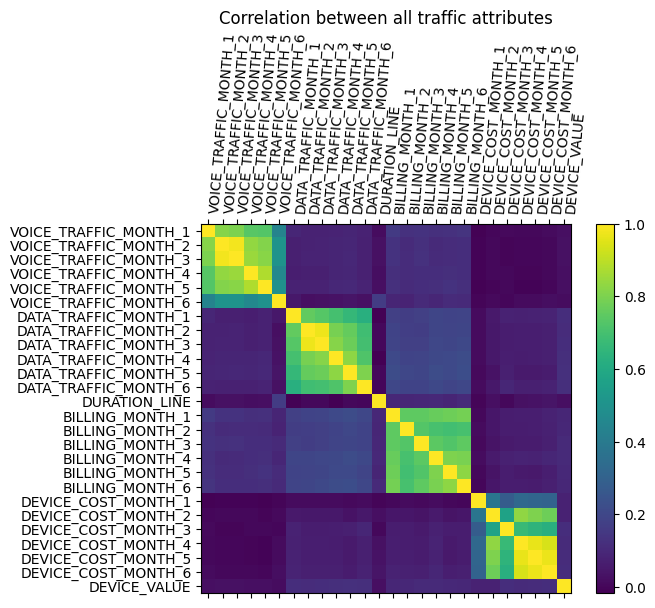

In [504]:
#create a figure
fig = plt.figure()
#create a subplot to plot the side bar
ax = fig.add_subplot(111)
# matshow function to create this quadratic plot to show the correlations
correlation_ax = ax.matshow(correlation)
# plot the colorbar at the side of the quadratic plot
fig.colorbar(correlation_ax)

# set the labels to show of what feature is each square of the quadratic plot
ax.set_xticks(np.arange(26), labels = ['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
                                       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
                                       'DURATION_LINE',
                                       'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
                                       'DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6',
                                       'DEVICE_VALUE'])
# Set the labels in the right place
plt.setp(ax.get_xticklabels(), rotation=85, ha="left")

#same for y axis
ax.set_yticks(np.arange(26), labels = ['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
                                       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
                                       'DURATION_LINE',
                                       'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
                                       'DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6',
                                       'DEVICE_VALUE'])
#set title
plt.title("Correlation between all traffic attributes")
#show the figure
plt.show()

As evident from both the plot and the matrix, there is a stronger correlation between billing and data traffic compared to voice traffic. This suggests that individuals who spend more tend to use data services more than voice services.

## 2.3. Date management and period calculation

In [505]:
#Find the max value of the last device change to know the latest change then convert to int
latest_change = int(input_dataset_processed['LAST_DEVICE_CHANGE'].max())
#convert the value to string
latest_change = str(latest_change)

#convert the value to format year-month-day with strptime function
latest_change = datetime.datetime.strptime(latest_change, "%Y%m%d")
print("Latest change: \n", latest_change)

#sum 30 days to the latest change
now = latest_change + datetime.timedelta(days = 30)
print("Now [30 days later]: \n", now)

Latest change: 
 2019-05-01 00:00:00
Now [30 days later]: 
 2019-05-31 00:00:00


In [506]:
#convert to format year-month-day with pandas to_datetime function all the values of last_device_change column
series_converted = pd.to_datetime(input_dataset_processed['LAST_DEVICE_CHANGE'], format = "%Y%m%d")
#compute the difference between latest change + 1 month and each value of the column
difference = now - series_converted
#compute the difference in periods of 30 days
input_dataset_processed['MONTHS_LAST_DEVICE'] = difference / (30*datetime.timedelta(days = 1))
#fill nans with 0 and convert to int(useful for last exercise)
input_dataset_processed['MONTHS_LAST_DEVICE'] = input_dataset_processed['MONTHS_LAST_DEVICE'].fillna(value = 0)
input_dataset_processed['MONTHS_LAST_DEVICE'] = input_dataset_processed['MONTHS_LAST_DEVICE'].astype(int)

In [507]:
# same idea as before
line_converted = pd.to_datetime(input_dataset_processed['LINE_ACTIVATION_DATE'], format = "%Y%m%d")
difference_2 = now - line_converted
input_dataset_processed['DURATION_LINE'] = difference_2 / (datetime.timedelta(days = 1))
input_dataset_processed['DURATION_LINE'] = input_dataset_processed['DURATION_LINE'].fillna(value = 0)
input_dataset_processed['DURATION_LINE'] = input_dataset_processed['DURATION_LINE'].astype(int)

#in this cell we converted to int to do the mean of the duration line
mean = input_dataset_processed['DURATION_LINE'].mean()
print("The average of Duration Line in years is: ", mean/365)

The average of Duration Line in years is:  5.233890154738702



## 2.4. Standarization and scaling of numerical variables

### Standarization and MinMax
---

In [508]:
#Use the functions StandardScaler().fit_transform and MinMaxScaler().fit_transform to apply the standardization and minmax of selected columns

#DATA_TRAFFIC_MONTH_1
 ## Standarization
input_dataset_processed['DATA_TRAFFIC_MONTH_1_STAND'] = StandardScaler().fit_transform(input_dataset_processed[['DATA_TRAFFIC_MONTH_1']])
 ## MinMax
input_dataset_processed['DATA_TRAFFIC_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(input_dataset_processed[['DATA_TRAFFIC_MONTH_1']])

#VOICE_TRAFFIC_MONTH_1
 ## Standarization
input_dataset_processed['VOICE_TRAFFIC_MONTH_1_STAND'] = StandardScaler().fit_transform(input_dataset_processed[['VOICE_TRAFFIC_MONTH_1']])
 ## MinMax
input_dataset_processed['VOICE_TRAFFIC_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(input_dataset_processed[['VOICE_TRAFFIC_MONTH_1']])

# BILLING_MONTH_1
 ## Standarization
input_dataset_processed['BILLING_MONTH_1_STAND'] = StandardScaler().fit_transform(input_dataset_processed[['BILLING_MONTH_1']])
 ## MinMax
input_dataset_processed['BILLING_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(input_dataset_processed[['BILLING_MONTH_1']])

# DEVICE_COST_MONTH_1
 ## Standarization
input_dataset_processed['DEVICE_COST_MONTH_1_STAND'] = StandardScaler().fit_transform(input_dataset_processed[['DEVICE_COST_MONTH_1']])
 ## MinMax
input_dataset_processed['DEVICE_COST_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(input_dataset_processed[['DEVICE_COST_MONTH_1']])

### Standarization and MinMax DATA_TRAFFIC_MONTH_1 Histogram
---

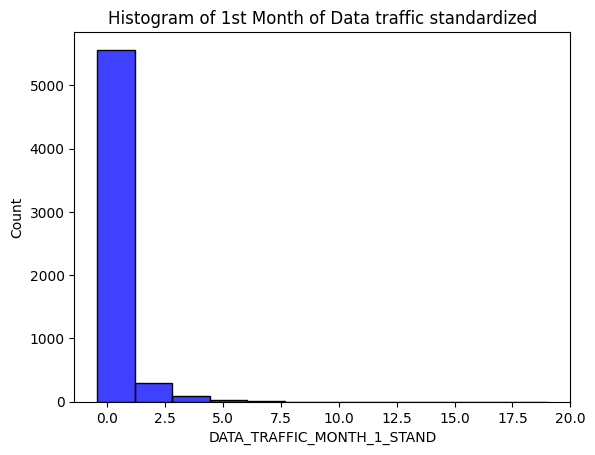

In [509]:
#plot the histplots as previous cells
sns.histplot(input_dataset_processed, x = 'DATA_TRAFFIC_MONTH_1_STAND', bins = 12, color = 'blue')
plt.title("Histogram of 1st Month of Data traffic standardized")
plt.show()

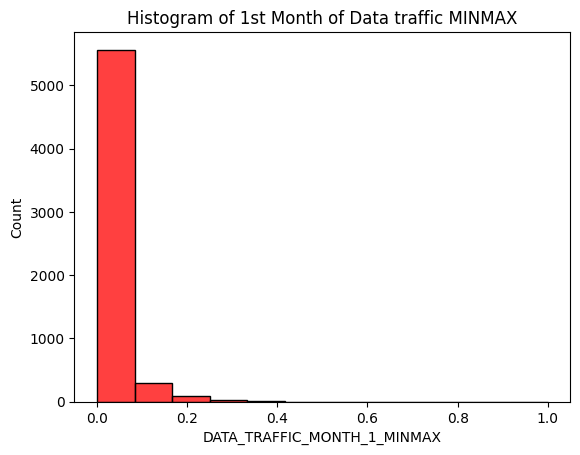

In [510]:
#plot the histplots as previous cells
sns.histplot(input_dataset_processed, x = 'DATA_TRAFFIC_MONTH_1_MINMAX', bins = 12, color = 'red')
plt.title("Histogram of 1st Month of Data traffic MINMAX")
plt.show()

### Standarization and MinMax VOICE_TRAFFIC_MONTH_1 Histogram
---

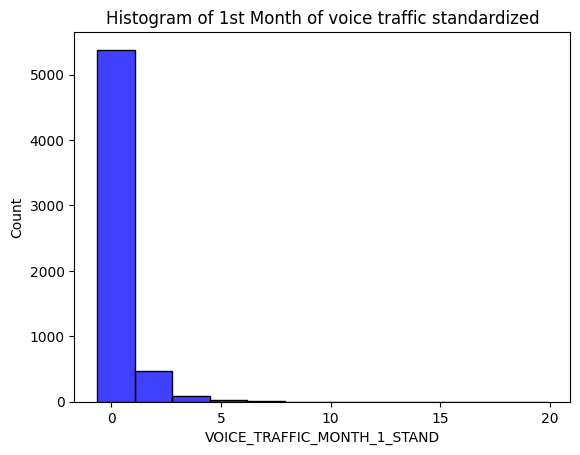

In [511]:
#plot the histplots as previous cells
sns.histplot(input_dataset_processed, x = 'VOICE_TRAFFIC_MONTH_1_STAND', bins = 12, color = 'blue')
plt.title("Histogram of 1st Month of voice traffic standardized")
plt.show()

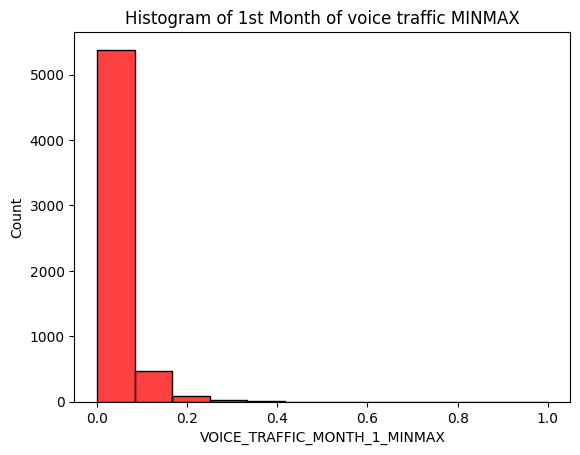

In [512]:
#plot the histplots as previous cells
sns.histplot(input_dataset_processed, x = 'VOICE_TRAFFIC_MONTH_1_MINMAX', bins = 12, color = 'red')
plt.title("Histogram of 1st Month of voice traffic MINMAX")
plt.show()

### Standarization and MinMax BILLING_MONTH_1 Histogram
---

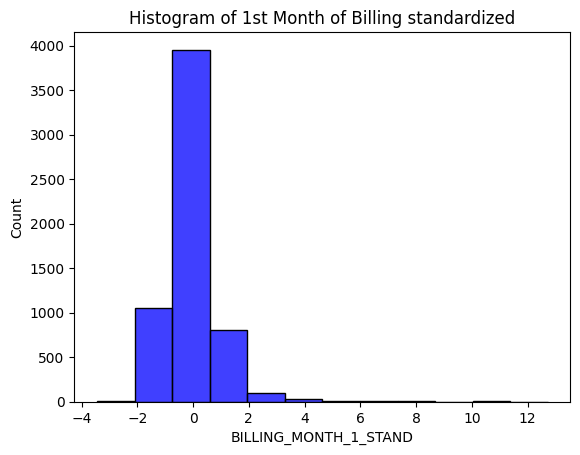

In [513]:
#plot the histplots as previous cells
sns.histplot(input_dataset_processed, x = 'BILLING_MONTH_1_STAND', bins = 12, color = 'blue')
plt.title("Histogram of 1st Month of Billing standardized")
plt.show()

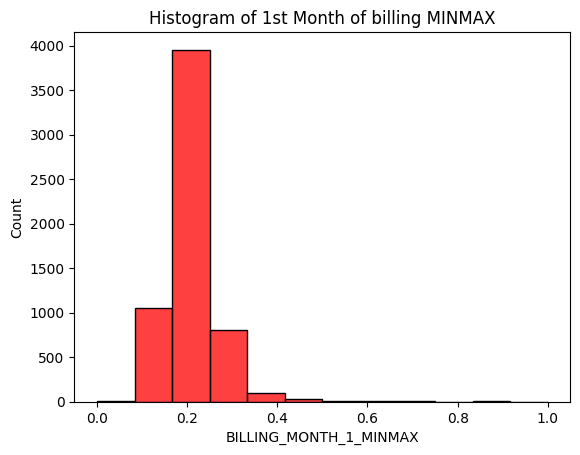

In [514]:
#plot the histplots as previous cells
sns.histplot(input_dataset_processed, x = 'BILLING_MONTH_1_MINMAX', bins = 12, color = 'red')
plt.title("Histogram of 1st Month of billing MINMAX")
plt.show()

### Standarization and MinMax DEVICE_COST_MONTH_1 Histogram
---

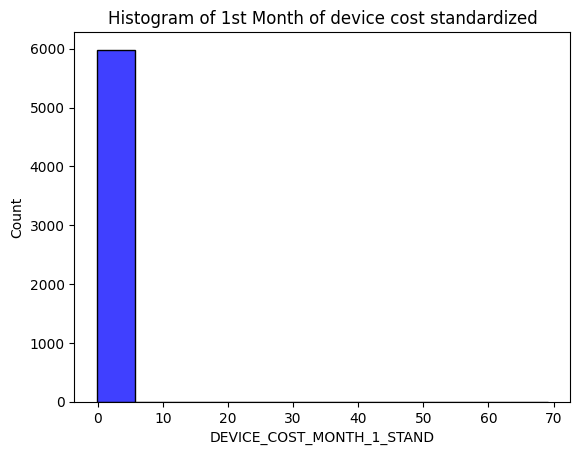

In [515]:
#plot the histplots as previous cells
sns.histplot(input_dataset_processed, x = 'DEVICE_COST_MONTH_1_STAND', bins = 12, color = 'blue')
plt.title("Histogram of 1st Month of device cost standardized")
plt.show()

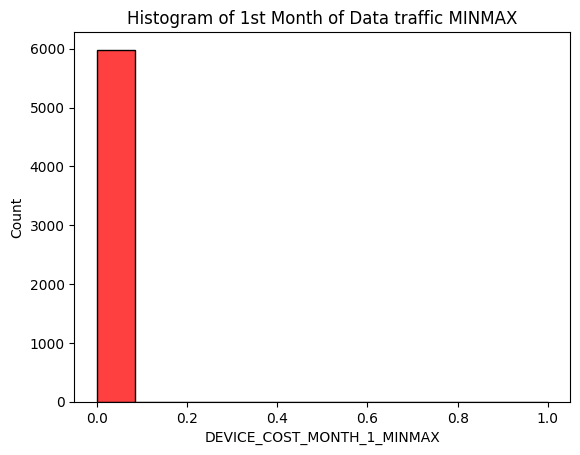

In [516]:
#plot the histplots as previous cells
sns.histplot(input_dataset_processed, x = 'DEVICE_COST_MONTH_1_MINMAX', bins = 12, color = 'red')
plt.title("Histogram of 1st Month of Data traffic MINMAX")
plt.show()

## 2.5. Convert categorical columns to dummy binary variables

In [517]:
#Use LabelEncoder().fit_transform function to apply the Label encoder for the selected column
input_dataset_processed['PREVIOUS_DEVICE_MODEL_INT_ENCODED'] = LabelEncoder().fit_transform(input_dataset_processed['PREVIOUS_DEVICE_MODEL'])

In [518]:
# We use the strategy One-hot-encoding of the previous device brand with get_dummies function and then put the dummies into the dataframe
manuf_dummies = pd.get_dummies(input_dataset_processed['PREVIOUS_DEVICE_MANUF'])
input_dataset_processed = input_dataset_processed.join(manuf_dummies)

## 2.6. Feature generation

In [519]:
# MEAN of selected columns with .mean() function
input_dataset_processed['DATA_TRAFFIC_MEAN'] = input_dataset_processed[['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6']].mean(axis = 1)
input_dataset_processed['VOICE_TRAFFIC_MEAN'] = input_dataset_processed[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6']].mean(axis = 1)
input_dataset_processed['BILLING_MEAN'] = input_dataset_processed[['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6']].mean(axis = 1)
input_dataset_processed['DEVICE_COST_MEAN'] = input_dataset_processed[['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']].mean(axis = 1)

# MAXIMUM value of selected columns with .max() function
input_dataset_processed['DATA_TRAFFIC_MAX'] = input_dataset_processed[['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6']].max(axis = 1)
input_dataset_processed['VOICE_TRAFFIC_MAX'] = input_dataset_processed[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6']].max(axis = 1)
input_dataset_processed['BILLING_MAX'] = input_dataset_processed[['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6']].max(axis = 1)
input_dataset_processed['DEVICE_COST_MAX'] = input_dataset_processed[['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']].max(axis = 1)

# MINIMUM value of selected columns with .min() function
input_dataset_processed['DATA_TRAFFIC_MIN'] = input_dataset_processed[['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6']].min(axis = 1)
input_dataset_processed['VOICE_TRAFFIC_MIN'] = input_dataset_processed[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6']].min(axis = 1)
input_dataset_processed['BILLING_MIN'] = input_dataset_processed[['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6']].min(axis = 1)
input_dataset_processed['DEVICE_COST_MIN'] = input_dataset_processed[['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']].min(axis = 1)



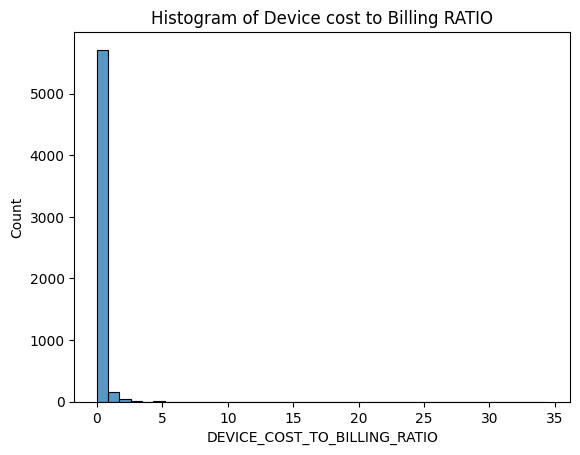

In [520]:
#Compute the device cost to billing ratio with the formula and then plot the histogram
input_dataset_processed['DEVICE_COST_TO_BILLING_RATIO'] = input_dataset_processed['DEVICE_COST_MEAN'] / input_dataset_processed['BILLING_MEAN']
sns.histplot(input_dataset_processed, x = 'DEVICE_COST_TO_BILLING_RATIO', bins = 40)
plt.title("Histogram of Device cost to Billing RATIO")
plt.show()

Most of the data is clustered around zero, making it difficult to draw meaningful conclusions from the histogram. However, the remaining bins suggest a pattern resembling an exponential distribution.

## 2.7. Text parsing/processing

In [521]:
# Split the rows of the column purchased device with str.split function
# first argument--> select when split in this case it's "_" or a space, the | it's an "or"
# n = 2 argument it's to select the maximum number of splits
# third argument it's to expand the split strings into a separate columns
split = input_dataset_processed['PURCHASED_DEVICE'].str.split("_| ", n = 2, expand = True)

#Code will be the first column, Manufacturer the 2nd and Model the 3rd.
input_dataset_processed['PURCHASED_DEVICE_CODE'] = split[0]
input_dataset_processed['PURCHASED_DEVICE_MANUFACTURER'] = split[1]
input_dataset_processed['PURCHASED_DEVICE_MODEL'] = split[2]

In [522]:
#as first cells where, we count the frequency of the values of purchased device manufacturer and previous device manufacturer
purchased_manuf = pd.DataFrame(input_dataset_processed["PURCHASED_DEVICE_MANUFACTURER"].value_counts())
previous_manuf = pd.DataFrame(input_dataset_processed["PREVIOUS_DEVICE_MANUF"].value_counts())

## 2.8. Splitting and sampling a dataset

In [523]:
#Split the data into train and test data, test_size = 0.3 means we will use the 30% of the dataset for test purposes
X_train, X_test= train_test_split(input_dataset_processed,test_size=0.3)

In [524]:
#plot the statistics of selected columns with .describe() function which we had seen previously
## TRAIN
stats_train = X_train[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()
display(stats_train)
## TEST
stats_test = X_test[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()
display(stats_test)


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,4191.000000,4191.000000,4191.000000
mean,2528.920861,130.012026,98.456683
std,5638.865940,193.995899,64.965723
min,0.000000,0.000000,-124.490000
25%,0.000000,9.900000,63.000000
50%,386.174870,62.200001,92.690000
75%,2704.462300,167.799995,120.840000
max,112421.170000,2377.899900,926.410000


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,1797.000000,1797.000000,1797.000000
mean,2615.455281,131.802059,102.094530
std,6079.590505,213.988708,64.921099
min,0.000000,0.000000,0.000000
25%,0.000000,9.900000,65.300000
50%,373.293330,63.700001,93.540000
75%,2702.889900,171.500000,121.140000
max,97074.617000,4113.000000,712.870000


They are nearly identical, and the discrepancy is too small to conclude that they don't match, so we can affirm that they do match.

# 3. Comparing iPhone and Samsung J series users

### IPHONE
---

In [525]:
# Create the dataframe of apple users
apple_users_df = pd.DataFrame(columns=input_dataset_processed.columns)

# Define the condition for Apple users
cond_apple = (input_dataset_processed['PURCHASED_DEVICE_MANUFACTURER'] == 'APPLE') & (input_dataset_processed['PURCHASED_DEVICE_MODEL'].str.startswith('IPHONE'))

# Select the rows that satisfy the condition
rows_apple = input_dataset_processed.loc[cond_apple, :]

# Concatenate the rows to the apple_users dataframe
apple_users_df = pd.concat([apple_users_df, rows_apple], ignore_index=True)

### SAMSUNG J SERIES
---

In [526]:
# Create the dataframe of apple users
samsung_users_df = pd.DataFrame(columns=input_dataset_processed.columns)

# Define the condition for Apple users
cond_samsung = (input_dataset_processed['PURCHASED_DEVICE_MANUFACTURER'] == 'SAMSUNG') & (input_dataset_processed['PURCHASED_DEVICE_MODEL'].str.startswith('J'))

# Select the rows that satisfy the condition
rows_samsung = input_dataset_processed.loc[cond_samsung, :]

# Concatenate the rows to the apple_users dataframe
samsung_users_df = pd.concat([samsung_users_df, rows_samsung], ignore_index=True)

### Comparing iPhone and Samsung J series users HISTOGRAMS
-----

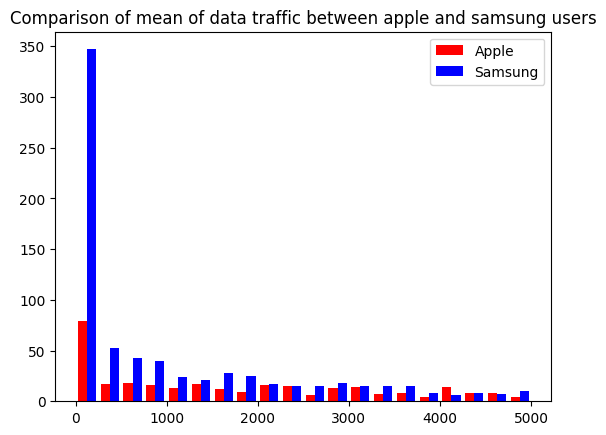

In [527]:
#plot the histogram of both apple and samsung users on the mean of the data traffic
fig, ax = plt.subplots()
#the last argument('range') it's because there was some outlier and I couldn't see at all the comparison, so the bars were so small, then I reduced the range of the x-axis to make bins more width
plt.hist([apple_users_df['DATA_TRAFFIC_MEAN'], samsung_users_df['DATA_TRAFFIC_MEAN']], color = ['r', 'b'], label = ['Apple', 'Samsung'], bins = 20, range = [0, 5000] )
plt.title("Comparison of mean of data traffic between apple and samsung users")
plt.legend()
plt.show()

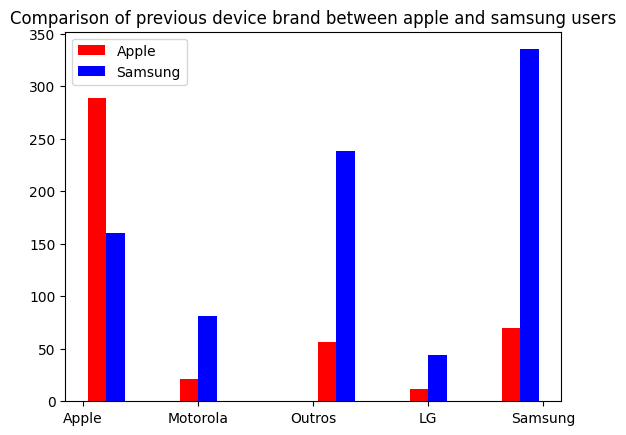

In [528]:
#Do the same of previous cell with another feature
fig, ax = plt.subplots()
plt.hist([apple_users_df['PREVIOUS_DEVICE_BRAND'], samsung_users_df['PREVIOUS_DEVICE_BRAND']], color = ['r', 'b'], label = ['Apple', 'Samsung'])
plt.title("Comparison of previous device brand between apple and samsung users")
plt.legend()
plt.show()

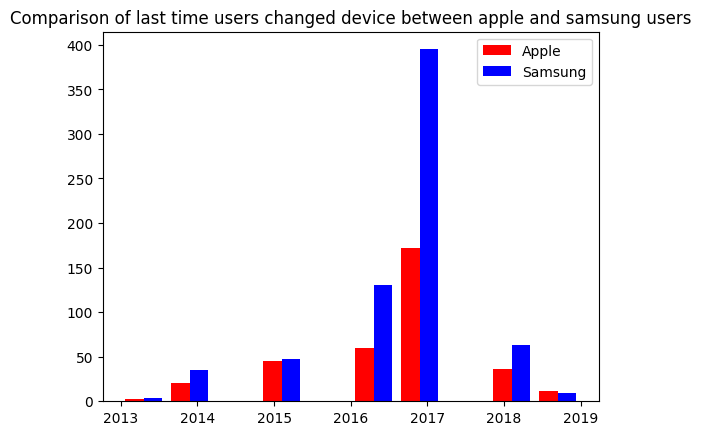

In [530]:
#To compare the last time users changed device, I had to convert the data into datetime type with pandas to_datetime()
#then convert the data into string and split to select only the year and store in the column the year when the user changed
#the device

fig, ax = plt.subplots()
apple_users_df = apple_users_df.dropna(subset=['LAST_DEVICE_CHANGE'])
samsung_users_df = samsung_users_df.dropna(subset=['LAST_DEVICE_CHANGE'])

#used try and except because otherwise the cell couldn't be executed more than once.
try:
    ## APPLE
    apple_users_df['LAST_DEVICE_CHANGE'] = pd.to_datetime(apple_users_df['LAST_DEVICE_CHANGE'], format ="%Y%m%d" )
    apple_users_df['LAST_DEVICE_CHANGE'] = apple_users_df['LAST_DEVICE_CHANGE'].astype(str).str[:10]
    apple_year_last_device_change = apple_users_df['LAST_DEVICE_CHANGE'].str.split("-", n = 1, expand = True)
    apple_users_df['LAST_DEVICE_CHANGE'] = apple_year_last_device_change[0]
    ## SAMSUNG
    samsung_users_df['LAST_DEVICE_CHANGE'] = pd.to_datetime(samsung_users_df['LAST_DEVICE_CHANGE'], format ="%Y%m%d")
    samsung_users_df['LAST_DEVICE_CHANGE'] = samsung_users_df['LAST_DEVICE_CHANGE'].astype(str).str[:10]
    samsung_year_last_device_change = samsung_users_df['LAST_DEVICE_CHANGE'].str.split("-", n = 1, expand = True)
    samsung_users_df['LAST_DEVICE_CHANGE'] = samsung_year_last_device_change[0]
except:
    None

#Convert the data into int to make the data plottable
apple_users_df['LAST_DEVICE_CHANGE'] = apple_users_df['LAST_DEVICE_CHANGE'].astype(int)
samsung_users_df['LAST_DEVICE_CHANGE'] = samsung_users_df['LAST_DEVICE_CHANGE'].astype(int)
plt.hist([apple_users_df['LAST_DEVICE_CHANGE'], samsung_users_df['LAST_DEVICE_CHANGE']], color = ['r', 'b'], label = ['Apple', 'Samsung'])
plt.title("Comparison of last time users changed device between apple and samsung users")
plt.legend()
plt.show()

The primary distinction I observed in the plots is that Apple users typically stick to Apple when purchasing a new mobile device, while Samsung users come from various brands and aren't as loyal to Samsung. Additionally, when examining the plot related to the year of the last device change, there isn't a significant difference between Apple and Samsung users, they both tend to upgrade their mobile devices every 2/3 years. However, drawing conclusions from the first plot is challenging due to the substantial difference in user numbers between Apple and Samsung. Nonetheless, it appears that the average data traffic for users is quite similar.

### EXTRA EXERCISE
---

**PROBLEM:**

For more learning and extra points, remember what you learned in machine learning and create a simple decision tree model having as input variables:

* PREVIOUS_DEVICE_MODEL
* PREVIOUS_DEVICE_BRAND
* MONTHS_LAST_DEVICE

And as output variable PURCHASED_DEVICE_MANUFACTURER. Measure the accuracy of this 3-variables model. Then, add two more variables, of your own choice, that improve the classification accuracy. Measure the accuracy of this 5-variables model.

In [543]:
## https://scikit-learn.org/stable/modules/tree.html
from sklearn.metrics import classification_report
from sklearn import tree

# Create the dataframe for the extra exercise
extra_df = pd.DataFrame(input_dataset_processed)

# Define the input features and output variable
input_features_3 = ['PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND', 'MONTHS_LAST_DEVICE']
input_features_5 = ['PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND', 'MONTHS_LAST_DEVICE', 'DATA_TRAFFIC_MEAN', 'DEVICE_VALUE']
output_variable = 'PURCHASED_DEVICE_MANUFACTURER'

# FIRST DECISION TREE ---------------------------------
# Extract the features and target
X = extra_df[input_features_3]
y = extra_df[output_variable]

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X, columns=['PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

# Decision Tree Model
model_DT = tree.DecisionTreeClassifier(max_depth=20)
model_DT.fit(X_train, y_train)

# Predictions
y_pred_DT = model_DT.predict(X_test)

# Accuracy and Classification Report
result_DT = model_DT.score(X_test, y_test)
print("First Decision Tree Accuracy:", result_DT)
print(classification_report(y_test, y_pred_DT))
# -----------------------------------------------------

print("\n")

# SECOND DECISION TREE --------------------------------
# Extract the features and target
X = extra_df[input_features_5]
y = extra_df[output_variable]

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X, columns=['PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

# Decision Tree Model
model_DT = tree.DecisionTreeClassifier(max_depth=20)
model_DT.fit(X_train, y_train)

# Predictions
y_pred_DT = model_DT.predict(X_test)

# Accuracy and Classification Report
result_DT = model_DT.score(X_test, y_test)
print("Second Decision Tree Accuracy:", result_DT)
print(classification_report(y_test, y_pred_DT))
# ----------------------------------


First Decision Tree Accuracy: 0.57039510294936
              precision    recall  f1-score   support

     ALCATEL       0.06      0.03      0.04        78
       APPLE       0.27      0.16      0.20       129
          LG       0.62      0.87      0.73      1087
    MOTOROLA       0.22      0.07      0.10       196
     SAMSUNG       0.38      0.13      0.19       307

    accuracy                           0.57      1797
   macro avg       0.31      0.25      0.25      1797
weighted avg       0.49      0.57      0.50      1797



Second Decision Tree Accuracy: 0.8219254312743461
              precision    recall  f1-score   support

     ALCATEL       0.75      0.69      0.72        78
       APPLE       0.82      0.86      0.84       129
          LG       0.93      0.92      0.93      1087
    MOTOROLA       0.60      0.56      0.58       196
     SAMSUNG       0.61      0.66      0.63       307

    accuracy                           0.82      1797
   macro avg       0.74      0.7

n the first decision tree model, the precision is around 60%. Notably, the model tends to predict "LG" more accurately due to a majority of the last devices being from the LG brand. However, it doesn't predict "LG" with 100% accuracy because the "Months last device" feature influences predictions, introducing some variability.

For the second decision tree model with two additional features, the precision has a great improvement. This indicates that these two features significantly contribute to distinguishing between phone brands. Specifically, "LG" remains the brand predicted most accurately. However, with the added features, the model also predicts other brands quite well, with "Apple" being predicted the most accurately among them.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>